In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from PIL import Image
import xlrd

In [10]:
left = pd.read_csv("employee_who_left.csv")
left.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [11]:
existing = pd.read_csv("existing_employee.csv")
existing.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [12]:
## Add the atrribute Churn to Existing Employeee dataset
existing['Churn']= 'No'
existing.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churn
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [13]:
## Add the attribute churn to Employee who has left dataset
left['Churn']='Yes'
left.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churn
0,1,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,Yes


In [14]:
## Combining left and existing Dataframes together to create a single dataframes.
employee_attrition =  pd.concat([left, existing], ignore_index=True)
employee_attrition.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churn
0,1,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,4,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,5,0.37,0.52,2,159,3,0,0,sales,low,Yes
5,6,0.41,0.50,2,153,3,0,0,sales,low,Yes
6,7,0.10,0.77,6,247,4,0,0,sales,low,Yes
7,8,0.92,0.85,5,259,5,0,0,sales,low,Yes
8,9,0.89,1.00,5,224,5,0,0,sales,low,Yes
9,10,0.42,0.53,2,142,3,0,0,sales,low,Yes


In [15]:
### Number of Employee who have left in Each department
print(left['dept'].value_counts())

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64


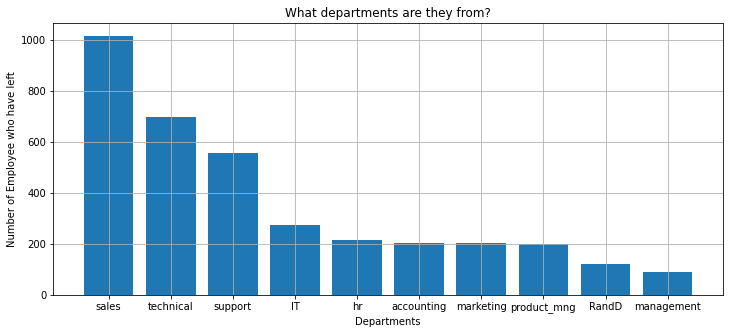

In [17]:
## Chart
fig1,ax= plt.subplots(figsize=(12,5))
ax.bar(left['dept'].value_counts().index,left['dept'].value_counts().values)
plt.ylabel("Number of Employee who have left")
plt.xlabel("Departments")
plt.title("What departments are they from?")
plt.grid()
# st.pyplot(fig1)

In [18]:
# ## Data Preprocessing

#a) Checking For Missing Values

#Removing Redindant Variables
employee_attrition.drop('Emp ID', axis=1, inplace=True)
#Checking For Missing Values
employee_attrition.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Churn                    0
dtype: int64

In [19]:
#b) Enconding All Categorical Variables

## Encoding The  Categorical Variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()

In [21]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in employee_attrition.columns:
    if employee_attrition[col].dtype == 'object':
        le.fit(employee_attrition[col])
        employee_attrition[col] = le.transform(employee_attrition[col])
        le_count += 1
        
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [22]:
## Selceting the Independent and Dependent Variables
X = employee_attrition.iloc[:,[0,1,2,3,4,5,6,7,8]].values ### Matrix of Independent faetures
y = employee_attrition.iloc[:,9].values    ### Vector of target varible 

In [31]:
### Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state= 1000)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
#b) Random forest Classifier

from sklearn.ensemble import RandomForestClassifier

## Trainign the Model
rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)

## Testing the Model
y_pred_rforest = rforest.predict(X_test)

In [33]:
## Classification Report

st.write("Classification Report:")
st.write(classification_report(y_test,y_pred_rforest))

In [36]:
# ### Predicting the Existing Employee with the Probability of leaving
st.sidebar.subheader(
"""
Predict Employee Who Will Leave
Enter Value For the Features Below
""")
def user_input():
    Satisfaction_level = st.sidebar.number_input("Satisfaction level",min_value=0.00, max_value= 0.99,value=0.5)
    Last_evaluation = st.sidebar.number_input("Last Evaluation",min_value=0.00, max_value= 0.99,value=0.5)
    number_project =st.sidebar.number_input('Number of project',min_value=0, max_value= 10,value=5)
    average_montly_hours = st.sidebar.number_input('The average montly hours',min_value=0.00, max_value= 1000.00,value=300.00)
    time_spend_company  = st.sidebar.number_input('Time spend in company',min_value=0, max_value= 20,value=5)
    Work_accident =st.sidebar.selectbox('Work accident',(0, 1))
    promotion_last_5years = st.sidebar.selectbox('Promotion last 5 years',(0, 1))
    dept = st.sidebar.selectbox('Department',("sales","technical","support","IT","hr","accounting","marketing","product_mng","randD","mangement"))
    Salary =  st.sidebar.selectbox('Salary Level ',("low","medium","high"))
    
    ### Dictionaries of Input
    input_user= {"Satisfaction_level":Satisfaction_level ,"Last_evaluation":Last_evaluation, "number_project":number_project,"average_montly_hours":average_montly_hours,"time_spend_company":time_spend_company,"Work_accident":Work_accident,"promotion_last_5years":promotion_last_5years, "dept":dept,"Salary":Salary}
               
    ### Cpnverting to a Dataframes
    input_user =pd.DataFrame(input_user,index=[0])
    return input_user

input_value = user_input()                               

#print(input_value.info())
        
# Label Encoding will be used for columns with 2 or less unique values

## Encoding The  Categorical Variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1= LabelEncoder()

le1_count = 0
for col in input_value.columns:
    if input_value[col].dtypes == 'object':
        le1.fit(input_value[col])
        input_value[col] = le1.transform(input_value[col])
        le1_count += 1


# print('{} columns were label encoded.'.format(le1_count))

if st.sidebar.button("Predict"):
    Prediction = rforest.predict(input_value)
    if Prediction == 0:
        result = pd.DataFrame({"Churn":Prediction,"Info":"The Employee will not Leave the Ogarnization"})
    else:
        result = pd.DataFrame({"Churn":Prediction,"Info":"The Employee wil Leave the Ogarnization"})                      
    
    st.write("""
    # The Result of the Classification:
    """)
    st.write("Attrition : ")  
    st.dataframe(result)